In [1]:
%pylab inline

from tools.issag import Sampler, _random_range_, _rejection_
from tools.issag import Models, iSSAG
import pandas as pd
import seaborn as sns
from scipy.stats import norm

from styles import slides

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%time
ssag = iSSAG(size=100)
ssag.set_all_seds(emission="both")

CPU times: user 18min 7s, sys: 1.3 s, total: 18min 9s
Wall time: 18min 19s


In [3]:
ssag.sample.head(n=10)

,t_form,gamma,truncated,t_trun,tau_trun,t_burst,t_ext,a_burst,metallicity,tau_v,mu_v,sigma_v,redshift
0,4.959518e+09,0.611759,True,7.367977e+08,1.045759e+08,3.520362e+09,7.143429e+07,0.081698,1.865246,1.460689,0.789660,251.639621,0.464878
1,6.429985e+09,0.122488,True,5.081344e+08,6.603068e+07,3.940033e+09,1.515183e+08,1.946868,0.329772,1.696522,0.101497,156.035167,0.677417
2,4.661286e+09,0.426239,False,NaN,NaN,2.863004e+09,2.080790e+08,0.955252,1.290431,0.888650,0.148503,101.939134,0.114447
3,2.096790e+09,0.721180,False,NaN,NaN,2.022431e+09,1.003434e+08,0.171495,1.056404,1.580746,0.460552,189.640491,0.047440
4,7.031009e+09,0.693868,False,NaN,NaN,6.148560e+09,2.317042e+08,1.258800,0.896212,0.458551,0.948019,262.639880,0.376724
5,4.651044e+09,0.521579,False,NaN,NaN,2.572294e+09,2.811562e+08,0.203220,2.286037,1.695220,0.378706,158.839985,0.116421
6,7.556292e+09,0.934057,False,NaN,NaN,3.478967e+09,2.370289e+08,0.234724,0.468103,0.691029,0.288338,155.671496,0.412514
7,2.860678e+09,0.588324,True,2.075931e+09,8.005534e+07,2.232349e+09,1.087540e+08,0.058906,1.090371,0.952917,0.139196,108.855274,0.226764
8,1.055544e+10,0.317710,False,NaN,NaN,4.834572e+09,2.418760e+08,0.828996,1.104198,0.711480,0.167614,393.318264,0.645904
9,4.078867e+09,0.240745,False,NaN,NaN,3.524934e+09,5.578397e+07,2.447668,2.314852,3.345680,0.490344,181.659715,0.034169


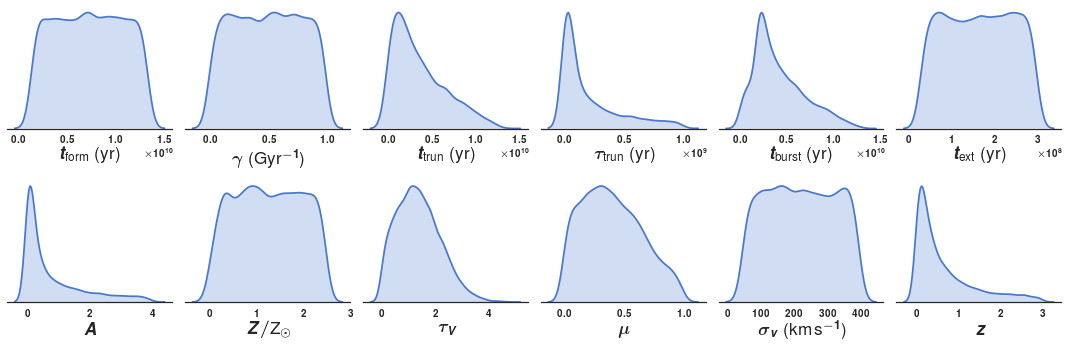

In [4]:
sns.set(style="white", palette="muted", color_codes=True)

fig, axs = subplots(2, 6, figsize=(15, 5))
axs = axs.ravel()
sns.despine(left=True)

labels = (
    r"$t_\text{form}$ (yr)",
    r"$\gamma$ (Gyr$^{-1}$)",
    r"$t_\text{trun}$ (yr)",
    r"$\tau_\text{trun}$ (yr)",
    r"$t_\text{burst}$ (yr)",
    r"$t_\text{ext}$ (yr)",
    r"$A$",
    r"$Z/\text{Z}_\odot$",
    r"$\tau_V$",
    r"$\mu$",
    r"$\sigma_v$ (km\,s$^{-1}$)",
    r"$z$"
)

cols = list(ssag.sample.columns)
cols.remove("truncated")

for i in xrange(axs.size):
    sns.distplot(ssag.sample.get(cols[i]).dropna(), hist=False, color="b", kde_kws={"shade": True},
                 axlabel=False, ax=axs[i])
    axs[i].set_xlabel(labels[i], size="x-large")

plt.setp(axs, yticks=[])
fig.tight_layout()

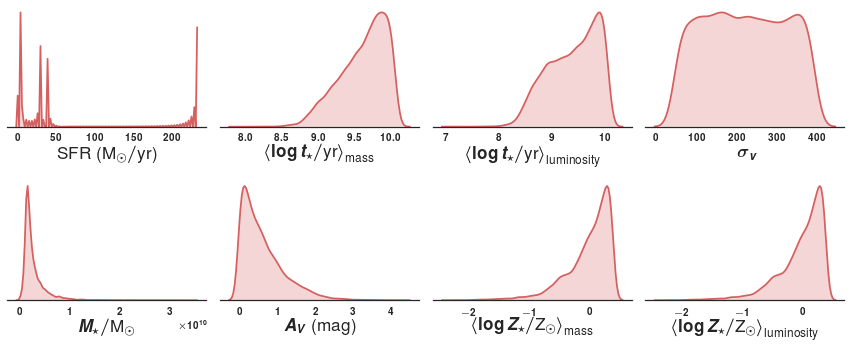

In [5]:
sns.set(style="white", palette="muted", color_codes=True)

fig, axs = subplots(2, 4, figsize=(12, 5))
axs = axs.ravel()
sns.despine(left=True)

labels = (
    r"SFR (M$_\odot/$yr)",
    r"$\left<\log{t_\star/\text{yr}}\right>_\text{mass}$",
    r"$\left<\log{t_\star/\text{yr}}\right>_\text{luminosity}",
    r"$\sigma_v$",
    r"$M_\star/\text{M}_\odot$",
    r"$A_V$ (mag)",
    r"$\left<\log{Z_\star/\text{Z}_\odot}\right>_\text{mass}$",
    r"$\left<\log{Z_\star/\text{Z}_\odot}\right>_\text{luminosity}"
)

for i in xrange(axs.size):
    sns.distplot(ssag.physical.iloc[:, i].dropna(), hist=False, color="r", kde_kws={"shade": True},
                 axlabel=False, ax=axs[i])
    axs[i].set_xlabel(labels[i], size="x-large")

plt.setp(axs, yticks=[])
fig.tight_layout()

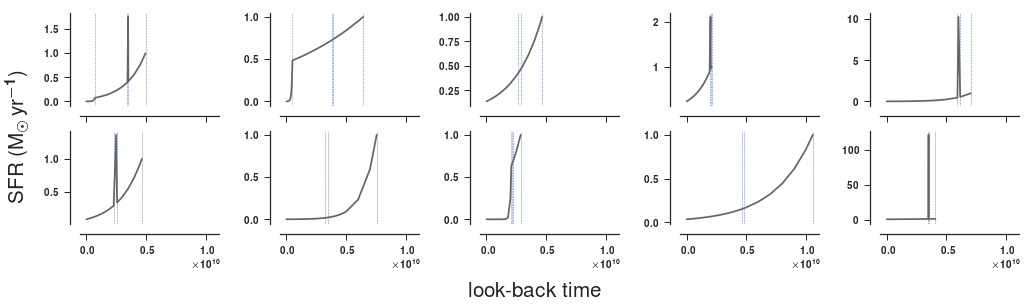

In [6]:
sns.set(style="ticks", palette="muted", color_codes=True)

fig, axs = subplots(2, 5, figsize=(14, 4), sharex=True)
axs = axs.ravel()
sns.despine(offset=10)

for j in xrange(10):
    i = j
    
    axs[j].axvline(ssag.sample.t_form[i], ls="--", lw=0.5)
    axs[j].axvline(ssag.sample.t_burst[i], ls="--", lw=0.5)
    axs[j].axvline(ssag.sample.t_burst[i]-ssag.sample.t_ext[i], ls="--", lw=0.5)
    axs[j].axvline(ssag.sample.t_trun[i], ls="--", lw=0.5, color="r")
    
    mask = ssag.sfhs.get(i).dropna().index.values <= ssag.sample.t_form[i]
    ssag.sfhs.get(i).dropna()[mask].plot(ax=axs[j], color="0.4")

fig.text(0.5, 0.0, r"look-back time", size="xx-large", ha="center", va="top")
fig.text(0.0, 0.5, r"SFR (M$_\odot$\,yr$^{-1}$)", size="xx-large", ha="right", va="center", rotation="vertical")
fig.tight_layout()

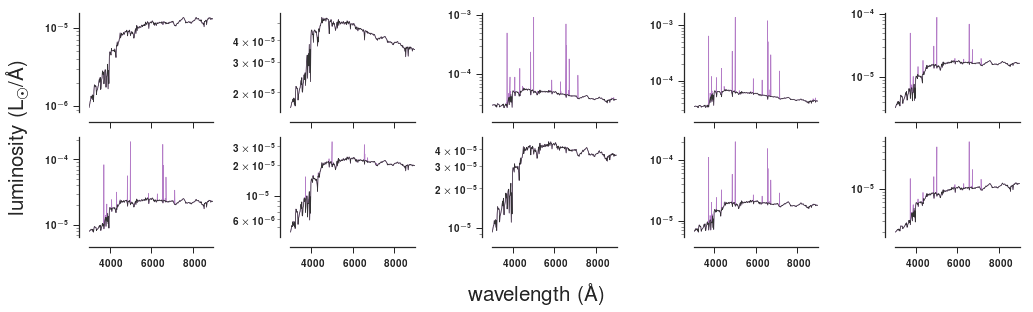

In [7]:
sns.set(style="ticks", palette="muted", color_codes=True)

fig, axs = subplots(2, 5, figsize=(14, 4), sharex=True)
xlim(3000,9000)
axs = axs.ravel()
sns.despine(offset=10)

for i in xrange(10):
    if ssag.seds_nebular is not None:
        mask = (3000<=ssag.seds_nebular.index)&(ssag.seds_nebular.index<=9000)
        ssag.seds_nebular[i][mask].plot(ax=axs[i], lw=0.7, color="m", logy=True)
    if ssag.seds_stellar is not None:
        mask = (3000<=ssag.seds_stellar.index)&(ssag.seds_stellar.index<=9000)
        ssag.seds_stellar[i][mask].plot(ax=axs[i], lw=0.7, color="0.2", logy=True)

fig.text(0.5, 0.0, r"wavelength (\AA)", size="xx-large", ha="center", va="top")
fig.text(0.0, 0.5, r"luminosity (L$_\odot$/\AA)", size="xx-large", ha="right", va="center", rotation="vertical")
fig.tight_layout()